#DATASET: wheat.csv

https://www.kaggle.com/datasets/sudhanshu2198/wheat-variety-classification

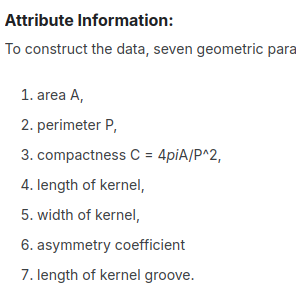



* **Conjunto de datos**: Clasificación de variedades de trigo

* **Información del conjunto de datos**:
El conjunto de datos comprendía granos de trigo pertenecientes a tres variedades diferentes de trigo: Kama, Rosa y Canadian, 70 elementos cada una.
Todos estos parámetros fueron de valor real continuo.

* **Información de atributos**:
Para construir los datos, se midieron siete parámetros geométricos de los granos de trigo:
área A, perímetro P, compacidad C = 4piA/P^2, longitud del grano, ancho del grano, coeficiente de
asimetría y longitud del surco del grano.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ruta_al_csv = '/content/drive/My Drive/mineria_de_datos/unidad_3/wheat.csv'
dataWheat = pd.read_csv(ruta_al_csv)

#Análisis exploratorio

In [5]:
target_names = {
1:'Kama',
2:'Rosa',
3:'Canadian'
}

In [6]:
dataWheat['category'] = dataWheat['category'].map(target_names)

Text(0.5, 0, 'asymmetry coefficient')

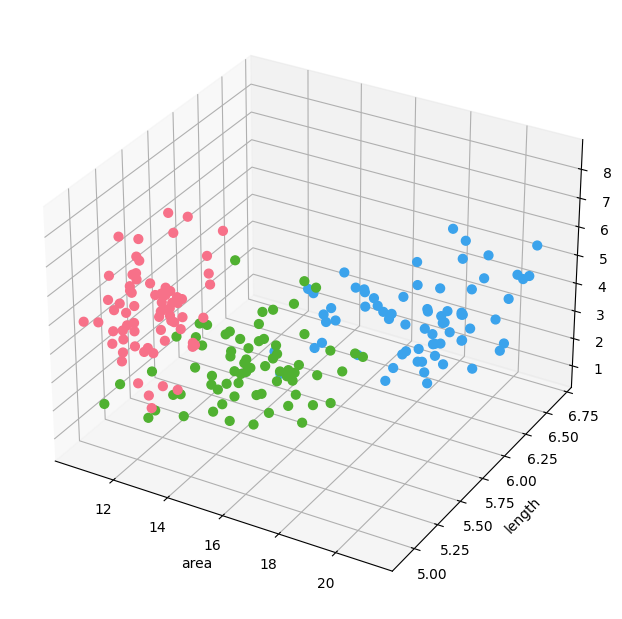

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
labels = np.unique(dataWheat['category'])
palette = sns.color_palette("husl", len(labels))
for label, color in zip(labels, palette):
  df1 = dataWheat[dataWheat['category'] == label]
  ax.scatter(df1['area'], df1['length'], df1['asymmetry coefficient'],s=40, marker='o', color=color, alpha=1, label=label)
ax.set_xlabel('area')
ax.set_ylabel('length')
ax.set_zlabel('asymmetry coefficient')

In [8]:
dataWheat.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [9]:
dataWheat.shape

(210, 8)

In [10]:
# Chequeo de datos null
dataWheat.isnull().sum()
dataWheat["category"].value_counts()

,count
category,
Kama,70
Rosa,70
Canadian,70


In [11]:
dataWheat.info() # Chequeamos que datos tenemos y si hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   groove length          210 non-null    float64
 7   category               210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


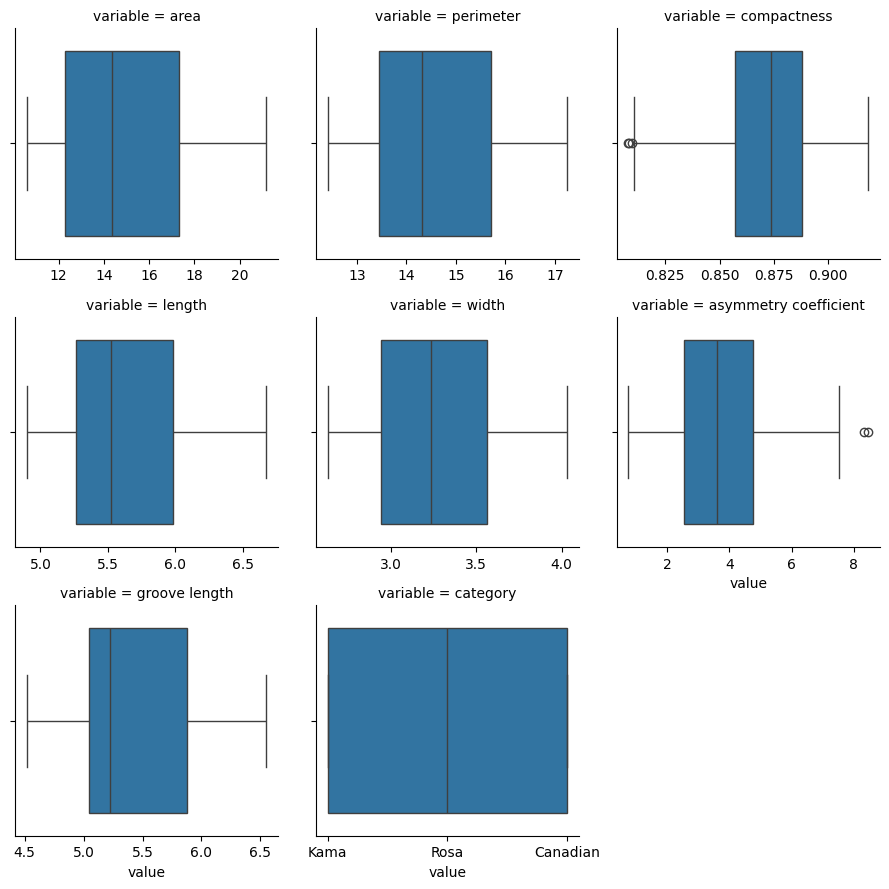

In [12]:
# Usar FacetGrid para crear gráficos en cuadrícula
g = sns.FacetGrid(pd.melt(dataWheat), col='variable', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'value')

plt.show()

#Remocion de Outliers

In [13]:
# IQR
# Columnas con outliers
outliers_col = ["compactness", "asymmetry coefficient"]
# limite mayor y menor
for col in outliers_col:
    Q1 = dataWheat[col].quantile(0.25)
    Q3 = dataWheat[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Arreglo de booleanos que indican las filas con outlaiers
    upper_array = np.where(dataWheat[col] >= upper)[0]
    lower_array = np.where(dataWheat[col] <= lower)[0]

    # Reemplazo de outliers por la media
    dataWheat[col][upper_array] = dataWheat[col].mean()
    dataWheat[col][lower_array] = dataWheat[col].mean()

<ipython-input-13-907044f57637>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWheat[col][upper_array] = dataWheat[col].mean()
<ipython-input-13-907044f57637>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWheat[col][lower_array] = dataWheat[col].mean()
<ipython-input-13-907044f57637>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWheat[col][upper_array] = dataWheat[col].mean()
<ipython-input-13-907044f57637>:18: S

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


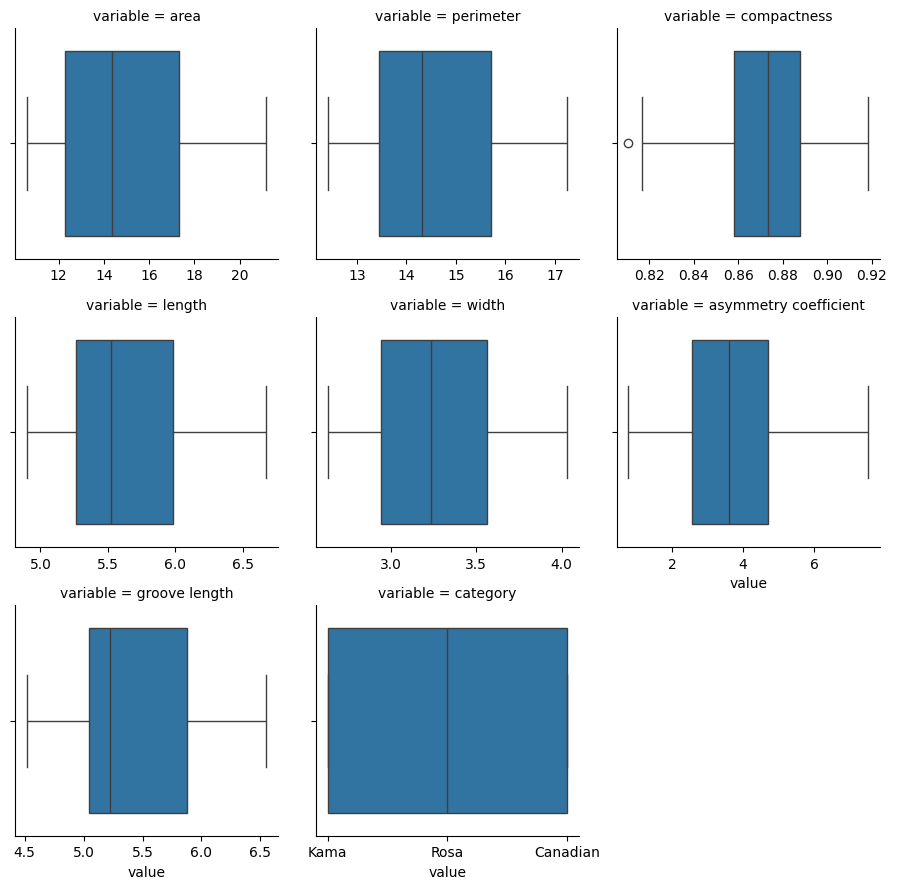

In [14]:
# Usar FacetGrid para crear gráficos en cuadrícula
g = sns.FacetGrid(pd.melt(dataWheat), col='variable', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'value')

plt.show()

In [15]:
dataWheat = dataWheat.drop(['category'], axis=1) #Elimino la columna de la categoria del data set ya que no vamos a trabajar con la misma

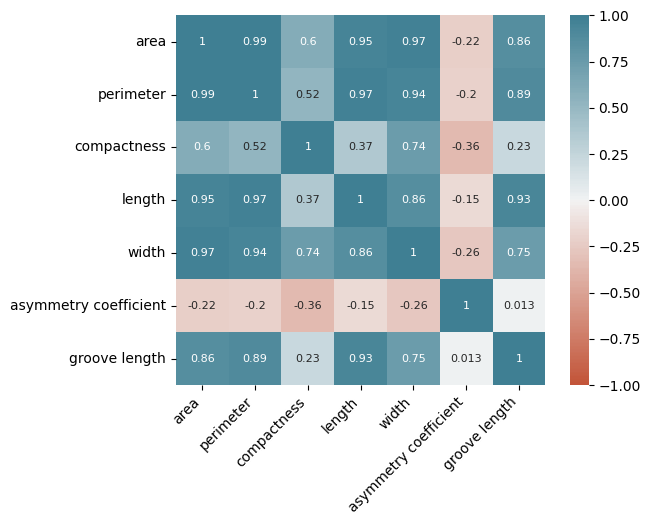

In [16]:
corr = dataWheat.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [17]:
xWheat = np.array(dataWheat[["area", "length", "asymmetry coefficient"]]) #me quedo con las variables mas representativas
column_names = ["area", "length", "asymmetry coefficient"]


#Normalizacion de datos

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Creo el objeto scaler
X_scaled = scaler.fit_transform(xWheat) # Calcula la media y la desviación estándar de los datos y luego aplica la transformación de estandarización.

In [19]:
data_estandarizada = pd.DataFrame(X_scaled, columns=column_names) # Solo para verlo como un data frame y no como array
data_estandarizada

,area,length,asymmetry coefficient
0,0.142098,0.304218,-1.004698
1,0.011188,-0.168625,-1.847212
2,-0.192067,-0.763637,-0.669934
3,-0.347091,-0.688978,-0.978085
4,0.445257,0.066666,-1.611196
...,...,...,...
205,-0.915515,-1.112048,-0.017214
206,-1.246235,-1.105261,0.468825
207,-0.567571,-0.888070,0.031251
208,-1.036090,-1.026077,-0.040325


#K means

## Calculo del diagrama de codo

El objetivo es identificar un punto en el gráfico donde la disminución en la suma de las distancias intraclúster (también conocida como inercia) comienza a disminuir de manera significativamente más lenta. Este punto se denomina "codo" y sugiere el número óptimo de clústeres para el conjunto de datos.

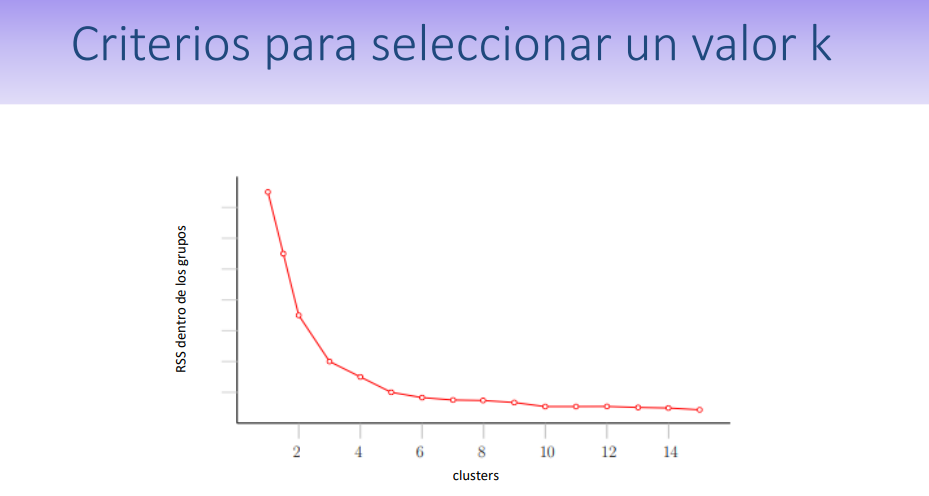

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

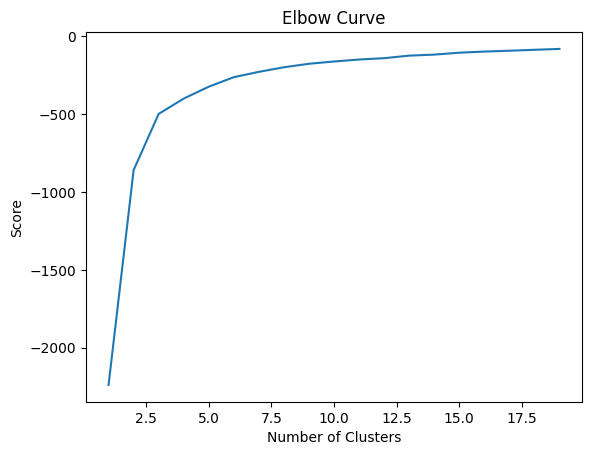

In [20]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(xWheat).score(xWheat) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

###Aplicamos el modelo



In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
dataWheat['Cluster KMeans'] = kmeans.labels_
dataWheat.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,Cluster KMeans
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [22]:
dataWheat.groupby('Cluster KMeans').mean()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length
Cluster KMeans,,,,,,,
0,12.083857,13.333143,0.855029,5.249129,2.888971,4.906334,5.098886
1,18.406812,16.165072,0.883981,6.167130,3.686942,3.660029,6.030681
2,14.113239,14.207606,0.876758,5.479169,3.206761,2.418115,5.107831


In [23]:
kmeans.cluster_centers_
# caracteristicas normalizadas que tendria el centroide de ese cluster.

array([[-0.9520813 , -0.85836763,  0.87595861],
       [ 1.22617224,  1.21852534,  0.00311648],
       [-0.25296047, -0.33792274, -0.86664986]])

In [24]:
observaciones_por_cluster = dataWheat['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

,count
Cluster KMeans,
0,70
1,69
2,71


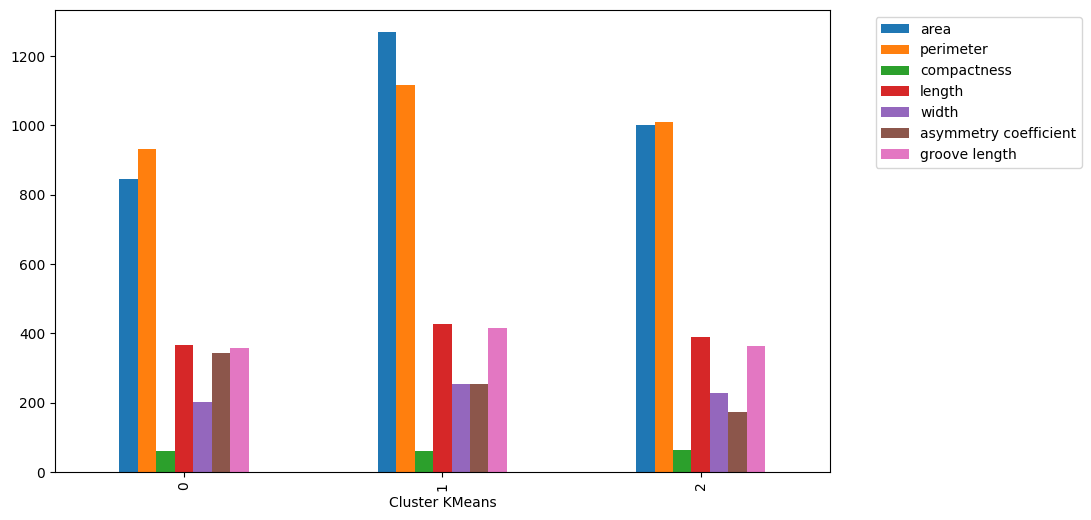

In [25]:
dataWheat.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

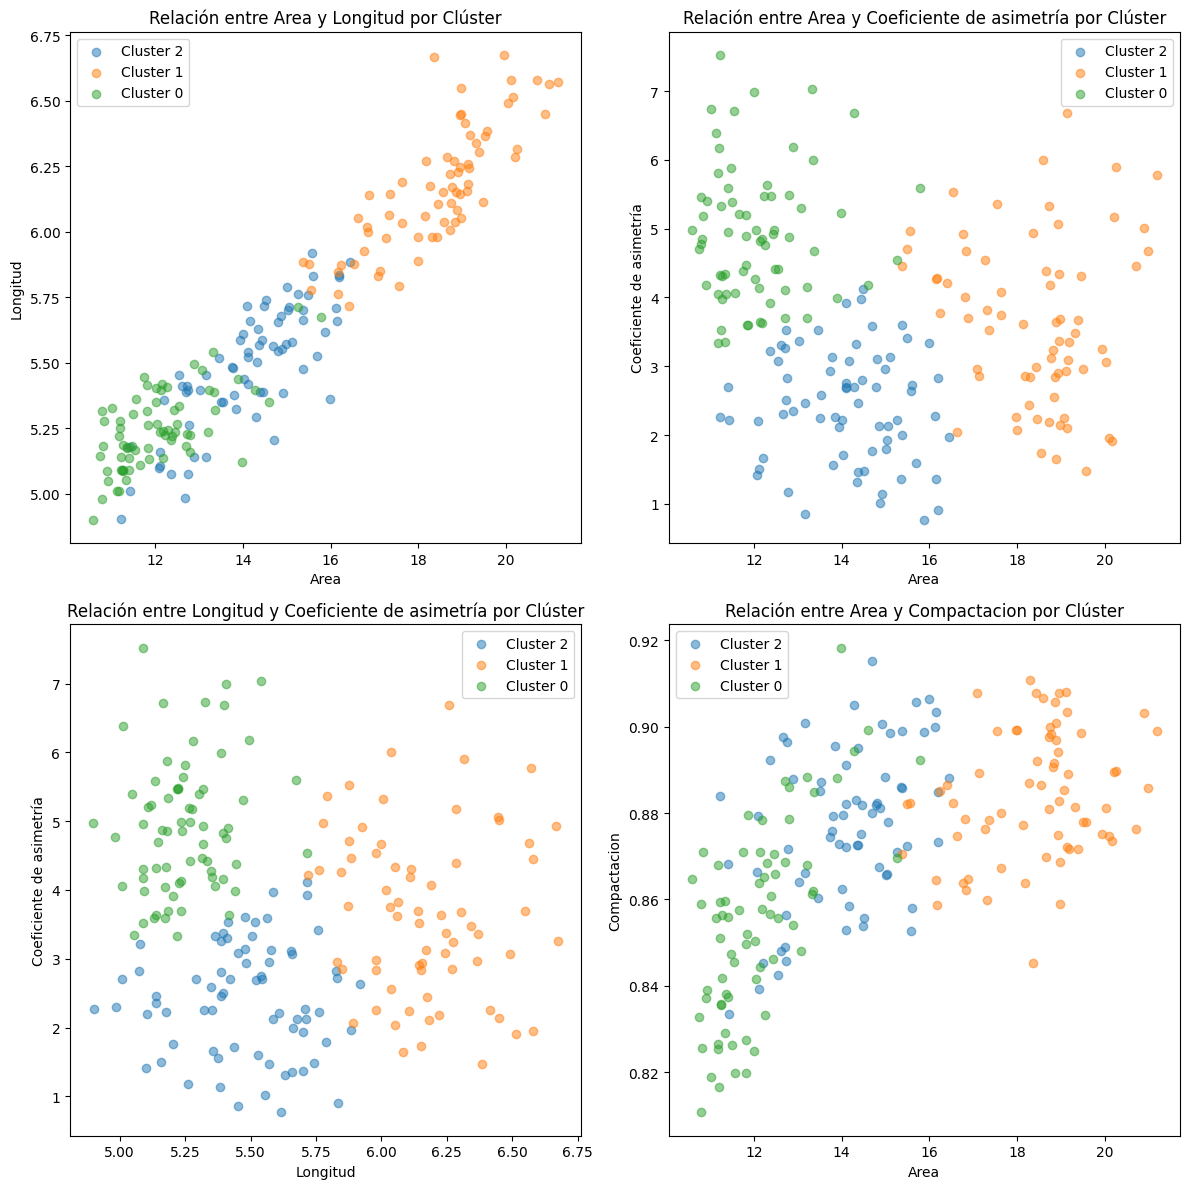

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

plt.sca(ax[0][0])
for cluster_label in dataWheat['Cluster KMeans'].unique():
    cluster_data = dataWheat[dataWheat['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['area'], cluster_data['length'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Area')
plt.ylabel('Longitud')
plt.title('Relación entre Area y Longitud por Clúster')
plt.legend()

plt.sca(ax[1][0])
for cluster_label in dataWheat['Cluster KMeans'].unique():
    cluster_data = dataWheat[dataWheat['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['length'], cluster_data['asymmetry coefficient'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Longitud')
plt.ylabel('Coeficiente de asimetría')
plt.title('Relación entre Longitud y Coeficiente de asimetría por Clúster')
plt.legend()

plt.sca(ax[0][1])
for cluster_label in dataWheat['Cluster KMeans'].unique():
    cluster_data = dataWheat[dataWheat['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['area'], cluster_data['asymmetry coefficient'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Area')
plt.ylabel('Coeficiente de asimetría')
plt.title('Relación entre Area y Coeficiente de asimetría por Clúster')
plt.legend()

plt.sca(ax[1][1])
for cluster_label in dataWheat['Cluster KMeans'].unique():
    cluster_data = dataWheat[dataWheat['Cluster KMeans'] == cluster_label]
    plt.scatter(cluster_data['area'], cluster_data['compactness'], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('Area')
plt.ylabel('Compactacion')
plt.title('Relación entre Area y Compactacion por Clúster')
plt.legend()


plt.tight_layout()

plt.show()


##Verificacion con predict

Text(0.5, 0, 'asymmetry coefficient')

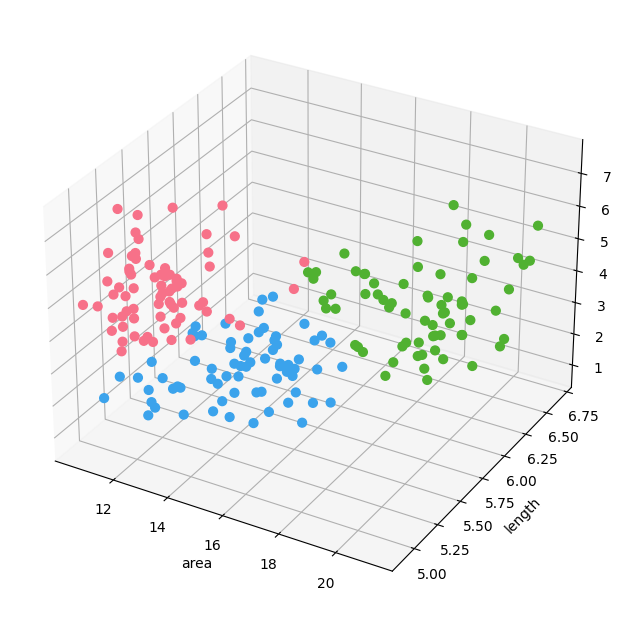

In [27]:
dataWheat['newClass'] = kmeans.predict(X_scaled)
labels = np.unique(dataWheat['newClass'])
palette = sns.color_palette("husl", len(labels))


# plot
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for label, color in zip(labels, palette):
    df1 = dataWheat[dataWheat['newClass'] == label]
    ax.scatter(df1['area'], df1['length'], df1['asymmetry coefficient'],
               s=40, marker='o', color=color, alpha=1, label=label)

ax.set_xlabel('area')
ax.set_ylabel('length')
ax.set_zlabel('asymmetry coefficient')

###Aplicamos PCA para visualizar si quedaron bien definidos los grupos de datos

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(X_scaled)

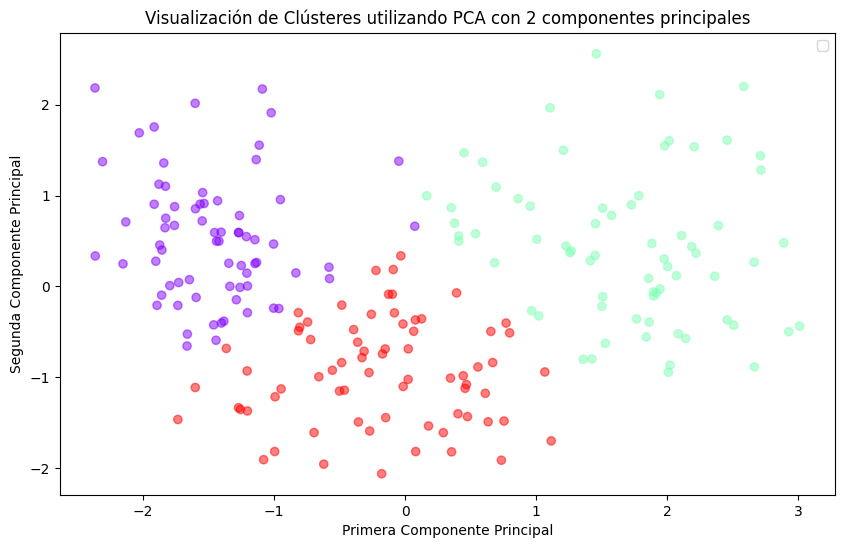

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=dataWheat['newClass'] ,cmap='rainbow', alpha=0.5)
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Visualización de Clústeres utilizando PCA con 2 componentes principales')
plt.legend()
plt.show()

In [30]:
##gs_obj = OptimalK(n_jobs=1, n_iter= 10)
#n_clusters = gs_obj(xWheat, n_refs=50, cluster_array=np.arange(1, 15))
#print('Optimal number of clusters: ', n_clusters)

#Clustering

In [31]:
# Importa la función linkage de SciPy para realizar el clustering jerárquico

Z = linkage(X_scaled, "ward")

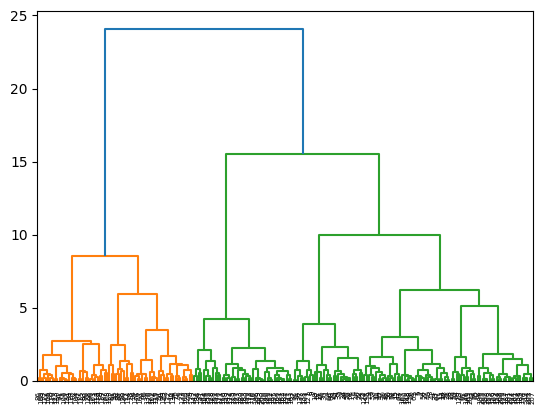

In [32]:
# Dibuja un dendrograma para visualizar el resultado del clustering jerárquico

dendrogram(Z)
plt.show()

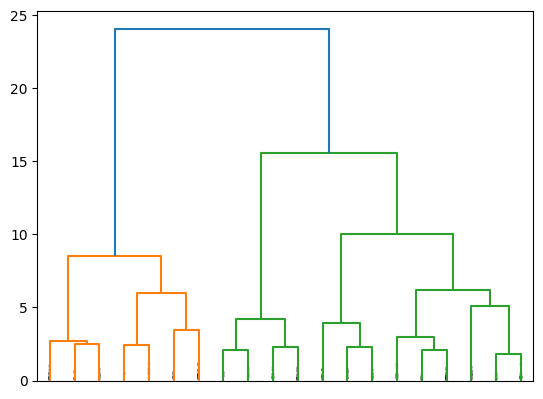

In [33]:
# Dibuja un dendrograma truncado (solo muestra las últimas p hojas)

dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = False, show_contracted = True)
plt.axhline(y=110, c='k', linestyle='dashed')
plt.show()

In [34]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 30):
    clustering = AgglomerativeClustering(n_clusters=i) # Aplica clustering jerárquico con i clusters
    clustering.fit(X_scaled)

    # Calcula la matriz de distancias por pares entre los puntos
    pairwise_distances = cdist(X_scaled, X_scaled, 'euclidean')

    # Calcula la distancia total dentro de los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j) # Encuentra los índices de los puntos en el cluster j
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum() # Suma las distancias dentro del cluster


    distancias.append(distancia_total) # Almacena la distancia total para el número de clusters i

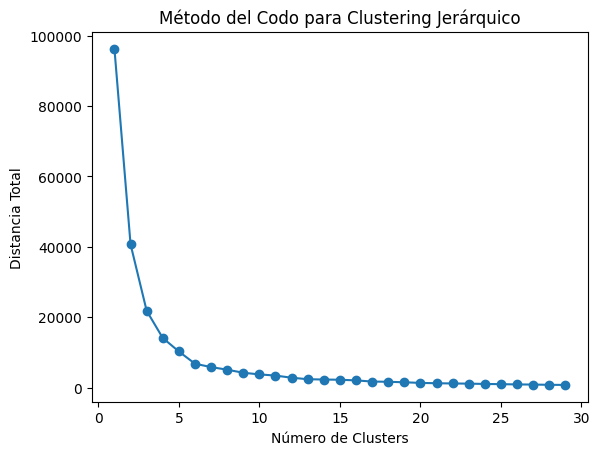

In [35]:
# Grafica la distancia total en función del número de clusters

plt.plot(range(1, 30), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()


In [36]:
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(X_scaled) # Asigna los clusters a los datos

dataWheat['Cluster'] = cluster_assignments # Añade la columna con el cluster asignado a cada punto

dataWheat.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,Cluster KMeans,newClass,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2,2,3
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2,2,3
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2,2,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2,2,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2,2,3


Text(0.5, 0, 'asymmetry coefficient')

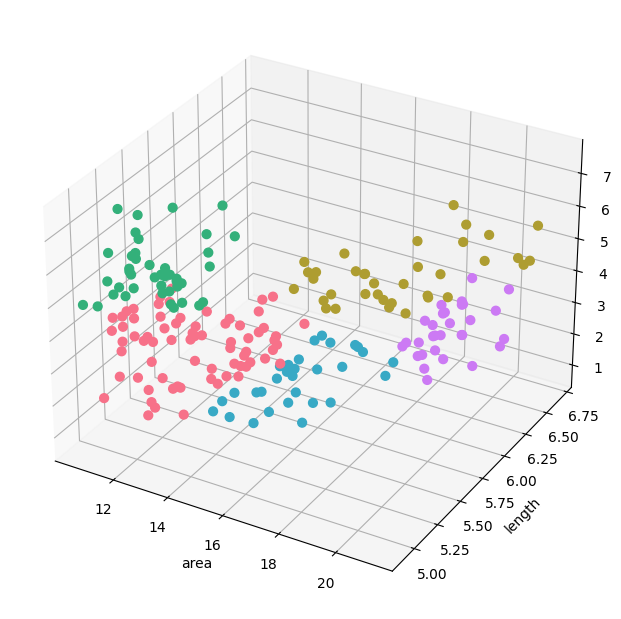

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False) # Crea un gráfico 3D
fig.add_axes(ax)
labels = np.unique(dataWheat['Cluster']) # Obtiene los clusters únicos
palette = sns.color_palette("husl", len(labels)) # Define una paleta de colores
for label, color in zip(labels, palette):
  df1 = dataWheat[dataWheat['Cluster'] == label]
  ax.scatter(df1['area'], df1['length'], df1['asymmetry coefficient'],s=40, marker='o', color=color, alpha=1, label=label) # Grafica los puntos en 3D
ax.set_xlabel('area')
ax.set_ylabel('length')
ax.set_zlabel('asymmetry coefficient')

In [38]:
from sklearn.metrics import silhouette_score,silhouette_samples
# Calcula el coeficiente de Silhouette promedio

silhouette_avg = silhouette_score(X_scaled, cluster_assignments)
silhouette_avg

0.326606177059799

#DBSCAN y HDBSCAN

In [39]:
!pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.5 MB/s eta 0:00:00


###Parametros DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

eps (Epsilon): Este parámetro controla la distancia máxima entre dos muestras para que una sea considerada parte del mismo clúster. En otras palabras, establece la distancia máxima entre puntos vecinos que se agruparán juntos. Un valor pequeño de eps puede hacer que el algoritmo encuentre más clústeres, mientras que un valor grande puede fusionar más puntos en un solo clúster.

min_samples: Este parámetro define el número mínimo de muestras (puntos de datos) en un vecindario para que un punto sea considerado núcleo (core point). Los puntos núcleo son aquellos que tienen al menos min_samples puntos dentro de una distancia de eps. Los puntos que no son núcleo, pero están dentro del vecindario de un punto núcleo, se consideran puntos límite o de borde.



In [113]:
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN

# Aplico DBSCAN con parámetros eps y min_samples
dbscan = DBSCAN(eps=0.6, min_samples=12)
dbscan_labels = dbscan.fit_predict(X_scaled)


# Cuenta el número de clusters identificados, excluyendo el ruido (-1)
groups = len(set(dbscan_labels))
count_noise = (1 if -1 in dbscan_labels else 0)

print("Número de clústeres identificados por DBSCAN:", groups - count_noise)

Número de clústeres identificados por DBSCAN: 3


###HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise):

min_cluster_size: Este parámetro establece el tamaño mínimo del clúster. Los clústeres con menos puntos que min_cluster_size no se considerarán como clústeres válidos y se etiquetarán como ruido (-1 en las etiquetas). Aumentar este valor tiende a producir menos clústeres.

In [114]:
# Aplica HDBSCAN con parámetro min_cluster_size

hdbscan = HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan.fit_predict(X_scaled)
print("Número de clústeres identificados por HDBSCAN:", len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0))

Número de clústeres identificados por HDBSCAN: 4


In [115]:
dataWheat['Cluster DBSCAN'] = dbscan_labels
dataWheat['Cluster HDBSCAN'] = hdbscan_labels

In [43]:
dataWheat

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,Cluster KMeans,newClass,Cluster,Cluster DBSCAN,Cluster HDBSCAN
0,15.26,14.84,0.8710,5.763,3.312,2.221000,5.220,2,2,3,0,4
1,14.88,14.57,0.8811,5.554,3.333,1.018000,4.956,2,2,3,0,-1
2,14.29,14.09,0.9050,5.291,3.337,2.699000,4.825,2,2,0,0,6
3,13.84,13.94,0.8955,5.324,3.379,2.259000,4.805,2,2,0,0,6
4,16.14,14.99,0.9034,5.658,3.562,1.355000,5.175,2,2,3,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631000,4.870,0,0,0,0,9
206,11.23,12.88,0.8511,5.140,2.795,4.325000,5.003,0,0,0,0,8
207,13.20,13.66,0.8883,5.236,3.232,3.700201,5.056,0,0,0,0,-1
208,11.84,13.21,0.8521,5.175,2.836,3.598000,5.044,0,0,0,0,9


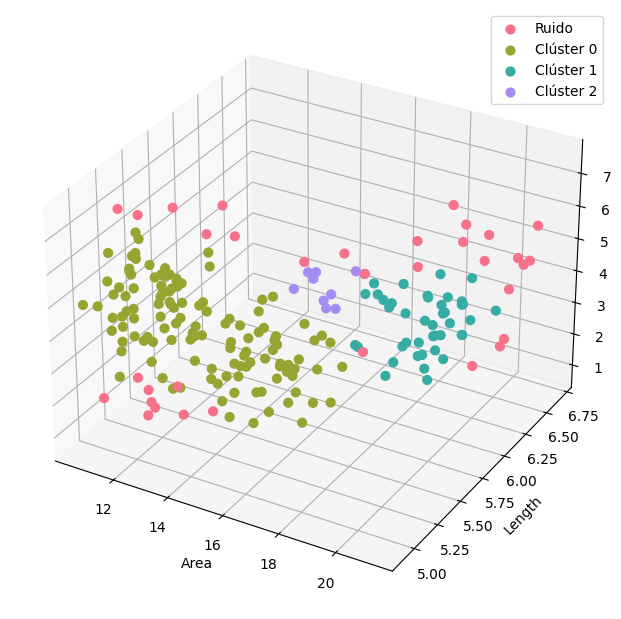

In [116]:
# Grafico los clusters obtenidos por DBSCAN
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Obtengo los valores únicos de los clústeres (incluyendo el ruido, que es -1)
labels = np.unique(dataWheat['Cluster DBSCAN'])

# Creo una paleta de colores
palette = sns.color_palette("husl", len(labels))

# Recorro los clústeres y asigno un color a cada uno
for label, color in zip(labels, palette):
    df1 = dataWheat[dataWheat['Cluster DBSCAN'] == label]

    # Defino la etiqueta para el ruido
    if label == -1:
        cluster_label = 'Ruido'
    else:
        cluster_label = f'Clúster {label}'

    # Grafico los puntos para cada clúster
    ax.scatter(df1['area'], df1['length'], df1['asymmetry coefficient'], s=40,
               marker='o', color=color, alpha=1, label=cluster_label)

# Etiquetas de los ejes
ax.set_xlabel('Area')
ax.set_ylabel('Length')
ax.set_zlabel('Asymmetry Coefficient')

# Muestra la leyenda
ax.legend(loc='best')

plt.show()

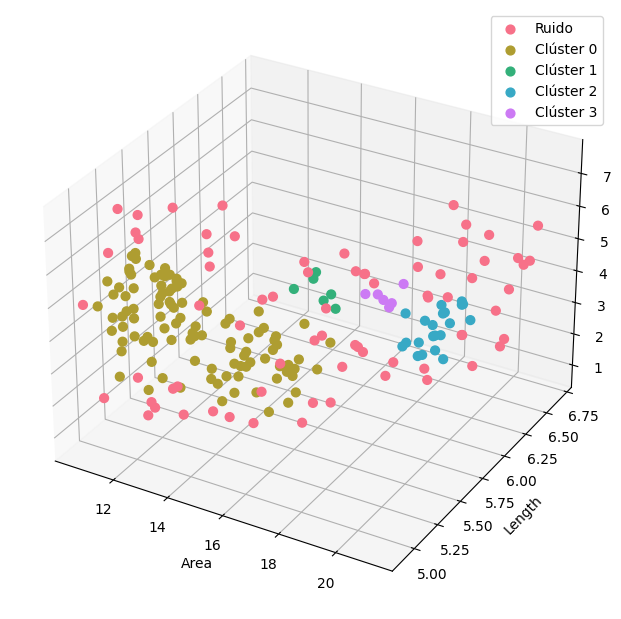

In [117]:
# Grafico los clusters obtenidos por HDBSCAN
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Obtengo los valores únicos de los clústeres (incluyendo el ruido, que es -1)
labels = np.unique(dataWheat['Cluster HDBSCAN'])

# Creo una paleta de colores
palette = sns.color_palette("husl", len(labels))

# Recorro los clústeres y asigno un color a cada uno
for label, color in zip(labels, palette):
    df1 = dataWheat[dataWheat['Cluster HDBSCAN'] == label]

    # Defino la etiqueta para el ruido
    if label == -1:
        cluster_label = 'Ruido'
    else:
        cluster_label = f'Clúster {label}'

    # Grafico los puntos para cada clúster
    ax.scatter(df1['area'], df1['length'], df1['asymmetry coefficient'], s=40,
               marker='o', color=color, alpha=1, label=cluster_label)

# Etiquetas de los ejes
ax.set_xlabel('Area')
ax.set_ylabel('Length')
ax.set_zlabel('Asymmetry Coefficient')

# Muestra la leyenda
ax.legend(loc='best')

plt.show()

#Validacion

##K-means

###Gap statistics

In [46]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k) # Aplica K-means
    kmeans.fit(X)
    return kmeans.inertia_ # Retorna la suma de distancias al centroide

In [47]:
gaps = []
max_k = 10

# Calcula el Gap Statistic para determinar el número óptimo de clusters

for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k)
    #Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*X_scaled.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

#se selecciona el valor de k (número de clusters) que maximiza el Gap Statistic.
optimal_k = np.argmax(gaps) + 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Número óptimo de clusters según el Gap Statistic: 10


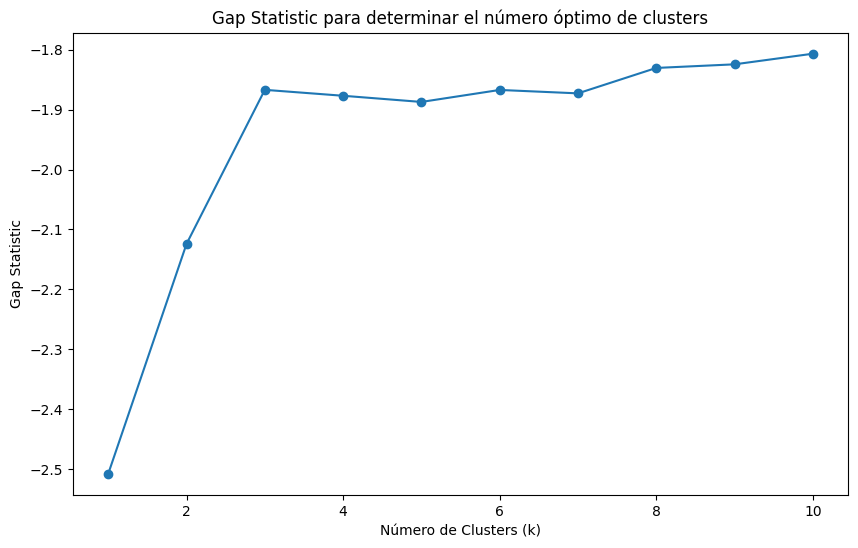

In [48]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

###Coeficiente de Silhouette

In [82]:
def calculate_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)  # Calcula el coeficiente de Silhouette
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 10

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(X_scaled, k)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

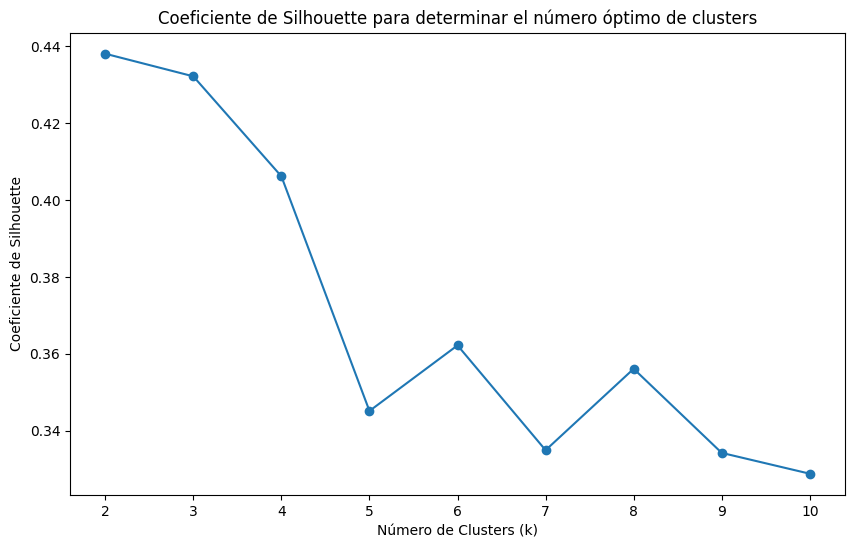

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters')
plt.show()

##Clustering

###Gap Statistics

In [84]:
def calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)

    # Calcula los centroides de los clústeres como la media de los puntos dentro de cada clúster
    centroids = np.array([np.mean(X_scaled[labels == i], axis=0) for i in range(k)])

    # Calcula la dispersión intraclúster sumando las distancias al cuadrado entre los puntos y sus centroides
    # np.linalg.norm calcula la norma (distancia euclidiana) entre los puntos y el centroide correspondiente
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_scaled[labels] - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion


In [85]:
gaps = []
max_k = 15
for k in range(1, max_k + 1):
    # Calcula la dispersión intraclúster en los datos reales para 'k' clústeres
    real_inertia = calculate_intra_cluster_dispersion(X_scaled, k, linkage='ward')

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*X_scaled.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 1


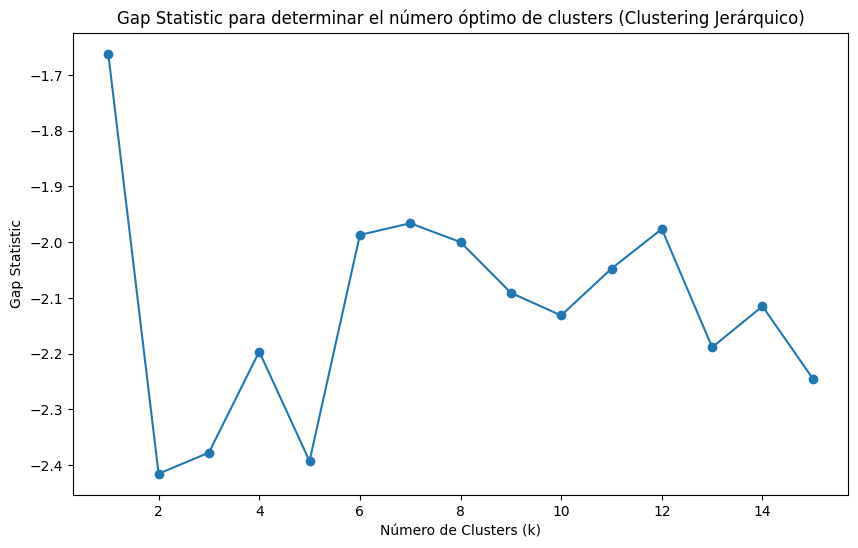

In [86]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()

###Coeficiente de Silhouette

In [87]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 15

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(X_scaled, k)
    silhouette_scores.append(silhouette_avg)

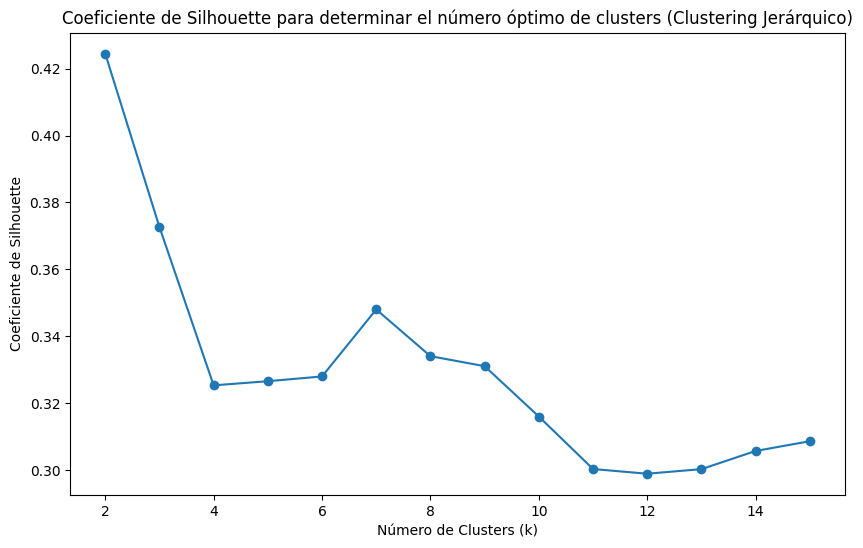

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()